## Summary of the following exploration.

Initially my aim was to find trends in the data which could be used to find the best time of year for Prosper to advertise their loans to different income groups. In this area I discovered that genrally every income range followed a similar pattern for borrowing money. People borrow more in the wither months and less in summer. I decided the company could try to target more specific groups and found that more than half of all loans from prosper were for debt consolidation. What's more is that debt consolidation loans followed the same pattern that the overall data was giving me (more loans in winter, less in summer). I decided to examine a few of the other loan Listing Categories and found some trends which may help the marketing team target different groups using a series of small ad campaigns.

.......

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

What I am most interested in with this data set is the borrowers. Specfically, I'm curious about their income and credit rating and how these things correlate to the amount they borrow. Another area of interest are the time of year people borrow- In a preliminary search I noted that there is a high volume of loans in the winter months. I'm interested to see the what the value of these loans are and I suspect that they may be small loans to pay for christmas. Another thing im curious of is if people with different levels of income are more inclined to borrow money at certain times of the year.

I'm going to take a marketing approach in my research and try to identify different marketing strategies for Prosper.

In [3]:
#import csv file as dataframe from given url and save as csv file.
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
df = pd.read_csv(url)
df.to_csv('loans.csv', index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

## Univariate

What are the status of the loans at the moment? What are the incomes of people who recieve loans? When are people most likely to get loans?

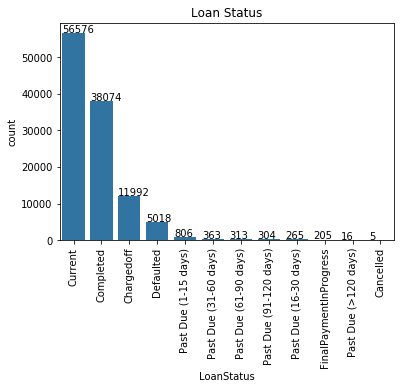

In [8]:
base_color = sb.color_palette()[0]
loan_status_order = df.LoanStatus.value_counts().index
loan_status_bar = sb.countplot(data = df, x = 'LoanStatus', order = loan_status_order, color = base_color);
plt.xticks(rotation = 90);
plt.title('Loan Status');

for p in loan_status_bar.patches:
    h = p.get_height()
    loan_status_bar.annotate('{:.0f}'.format(h), (p.get_x(), p.get_height()+200))
    

Loan Status seem to be pretty normal. About half of the loans are still current/past due. This makes sense because the data only goes back to 2006. 

In [9]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

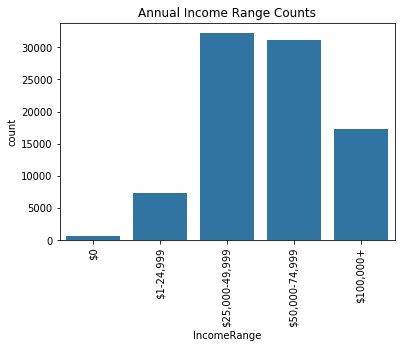

In [10]:
#Plot bar chart of incomes of borrowers. Omit 'Not Employed' and 'Not Available'
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
sb.countplot(data = df, x = 'IncomeRange', color = base_color, order = income_order);
plt.xticks(rotation = 90);
plt.title('Annual Income Range Counts');

Borrowers seem approximately normally distributed over income ranges. While this is a categorical column, the categories represent bins for income so I'll refer to this as a histogram, not a bar chart or count plot.

Text(0,0.5,'# of Borrowers')

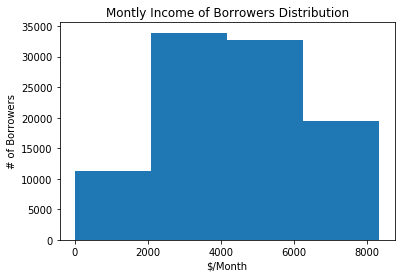

In [8]:
#Use a subset of the data to omit outliers.
bin_edges = np.arange(0, 125000/12, 25000/12)
plt.hist(df[df.StatedMonthlyIncome < 30000].StatedMonthlyIncome, bins = bin_edges);
plt.title('Montly Income of Borrowers Distribution');
plt.xlabel('$/Month')
plt.ylabel('# of Borrowers')

Monthly income distribution similar to the annual income distribution, but it's a little off. I think when filling this out some people accidentally put their annual income in place of monthly earnings. We wont use this column.

In [12]:
#change string object to datetime for df.LoanOriginationDate
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

## Bivariate

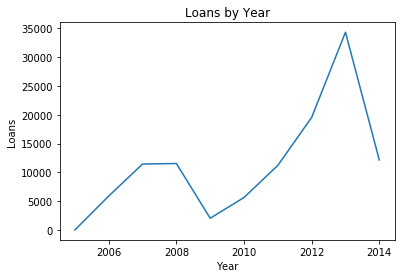

In [13]:
df.LoanOriginationDate.dt.year.value_counts().sort_index().plot(kind = 'line');
plt.xlabel('Year');
plt.ylabel('Loans');
plt.title('Loans by Year');

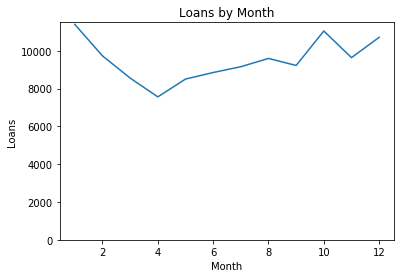

In [14]:

df.LoanOriginationDate.dt.month.value_counts().sort_index().plot(kind = 'line');
plt.xlabel('Month');
plt.ylabel('Loans');
plt.title('Loans by Month');
plt.ylim(0, 11500);

Yearly data suggest a huge dip in loans right about the time of the recession, this was expected. Monthly data suggest loans are more popular in winter months.

## MultiVariate

In [15]:
#create a list of our interested columns
interest_columns = ['BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeLower', 
                    'CreditScoreRangeUpper', 'LoanOriginalAmount', 'StatedMonthlyIncome']

#remove rows with np.nan in these columns
df.dropna(axis = 0, subset = interest_columns, inplace = True)

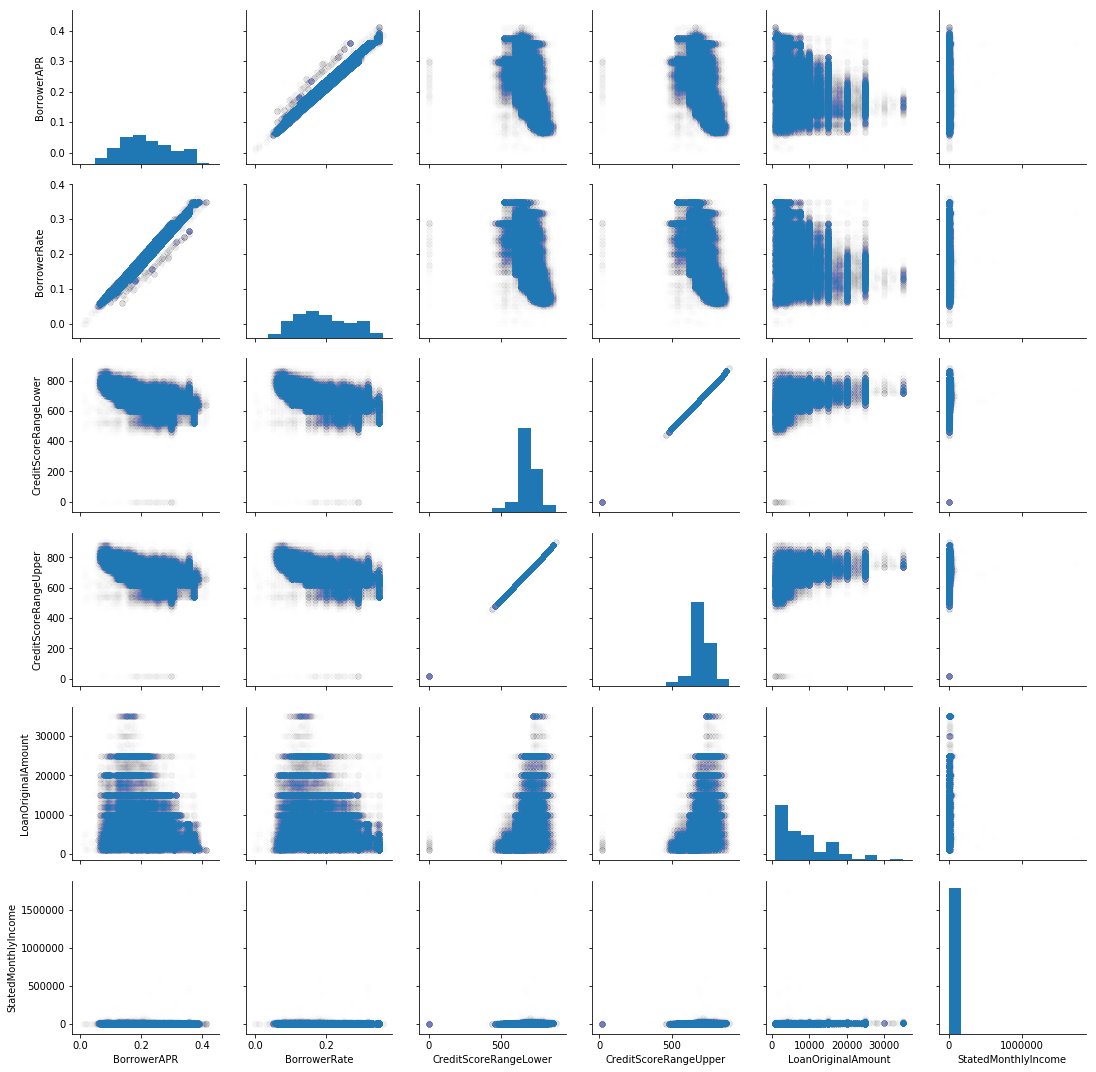

In [16]:
g = sb.PairGrid(data = df, vars = interest_columns)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 1/500)

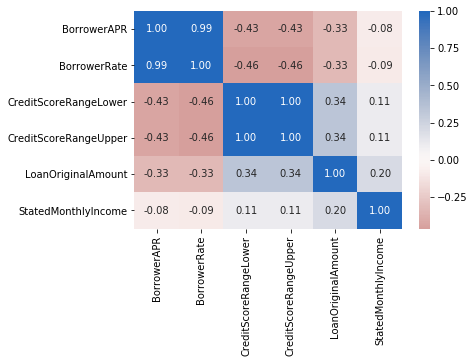

In [17]:
#Heatmap of correlations between our interest columns.
sb.heatmap(df[interest_columns].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


Notes:

Most interestingly is that the stated montly income has poor correlation with every column. A closer look at the data suggests that perhaps when people were filling out the form they put their annual income instead of their monthly income. There seem to be several people who make more than $20,000 per month. When examining this further we should omit rows with monthly incomes over a certain amount.

Not surprisingly, Borrower APR and Borrower Rate have an extremely strong correlation. Lower and Upper credit Scores are also strongly correlated.

Credit Score columns have a good negative correlation with BorrowerAPR and BorrowerRate which stands to reason as you would expect that people with a poor credit rating would pay more interest on their loans.

Loan Original Amount has a low-good negative correlation with BorrowerAPR and BorrowerRate which suggest that the higher the loan amount, the less interest you pay. This may be because people people who take out larger loans have higher salaries. It may also be linked to the low-good correlation with the LoanOriginalAmount and CreditScoreColumns.

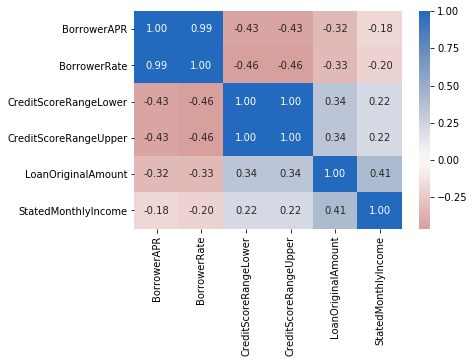

In [18]:
#create dataframe with monthly incomes of less than  20000
df2 = df[df.StatedMonthlyIncome < 20000]
#redo heatmap with new dataframe.
sb.heatmap(df2[interest_columns].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Omiting what we assumed to be incorrect data improved the correlation by double for all columns, but for most columns it is still a poor correlation so in the furtue we are just going to avoid using this column. We will instead use the qualitative column 'IncomeRange'

We're going to take a look at the time loans were taken out. For this purpose we will create two additional columns - Month and Year. Month will take an interger to represent the month, 1 being January and 12 being December.

In [19]:
#create new columns with month and year
df['Month'] = df.LoanOriginationDate.dt.month
df['Year'] = df.LoanOriginationDate.dt.year

Text(0.5,1,'When Loans were Taken')

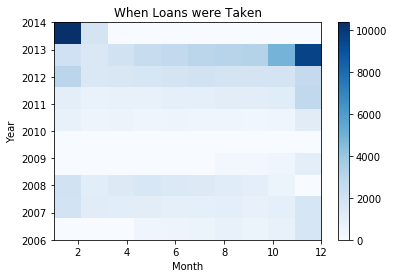

In [20]:
plt.hist2d(data = df, x = 'Month', y = 'Year', cmap = 'Blues');
plt.colorbar();
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('When Loans were Taken')

The visual above does a realy good job highlighting how popular loans got through 2013 an at the beggining of 2014, however, there are so many loans taken out in this time that the rest of the visual literally pales in comparison. Let's redo it omitting all data from 2013 onwards. Also, we didn't specify bins so the data has come out in 10x10 when it doesn't fit properly.

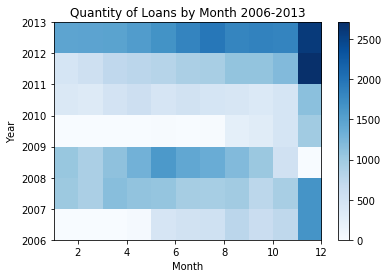

In [21]:
#create bins for x and y axes.
xbin = np.arange(1,13,1)
ybin = np.arange(2006,2014,1)
#plot heatmap
plt.hist2d(data = df[df.Year < 2013], x = 'Month', y = 'Year', cmap = 'Blues', 
           bins = (xbin, ybin));
plt.colorbar();
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Quantity of Loans by Month 2006-2013');

The above does an excellent job highlighting both which years and months are popular for loans. December is always a popular time for loans, probably due to christmas. The exception to this rules would be Christmas 2008 and the following spring. This gap in data can be accounted for by the recession at that time.

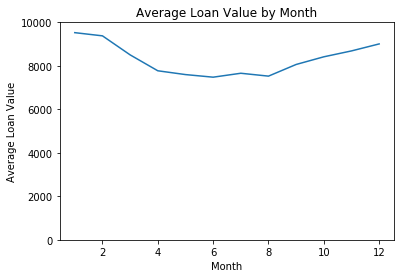

In [46]:
vals = df.groupby('Month')['LoanOriginalAmount'].mean()
vals.plot()
plt.ylim(0,10000)
plt.xlabel('Month')
plt.ylabel('Average Loan Value')
plt.title('Average Loan Value by Month');

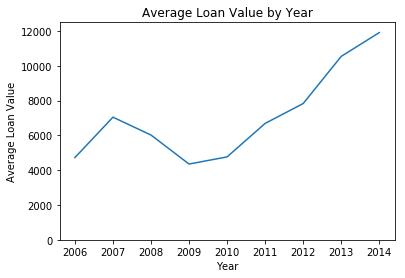

In [49]:
vals = df.groupby('Year')['LoanOriginalAmount'].mean()
vals.plot()
plt.ylim(0,12500)
plt.xlabel('Year')
plt.ylabel('Average Loan Value')
plt.title('Average Loan Value by Year');

Surprising to me is that the value of loans in the winter months is on average larger than in summer months. I expected that the quantity of loans in winter would be greater but the value of them would be less.

Next We're going to plot a ViolinPlot of Loan Amounts for each income range.

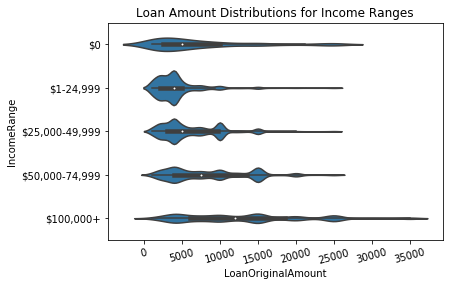

In [24]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
sb.violinplot(data = df, y = 'IncomeRange', x = 'LoanOriginalAmount', order = income_order, color = base_color)
plt.xticks(rotation = 15)
plt.title('Loan Amount Distributions for Income Ranges');

An interesting note on the violin plot is how the data is centered around the 5000 intervals. You'll note that while most of the violin tails reach about 25000, the distribution on each becomes thinner as the income range increases. This is further highlighted by the median of each plot which is larger as the income range becomes larger.

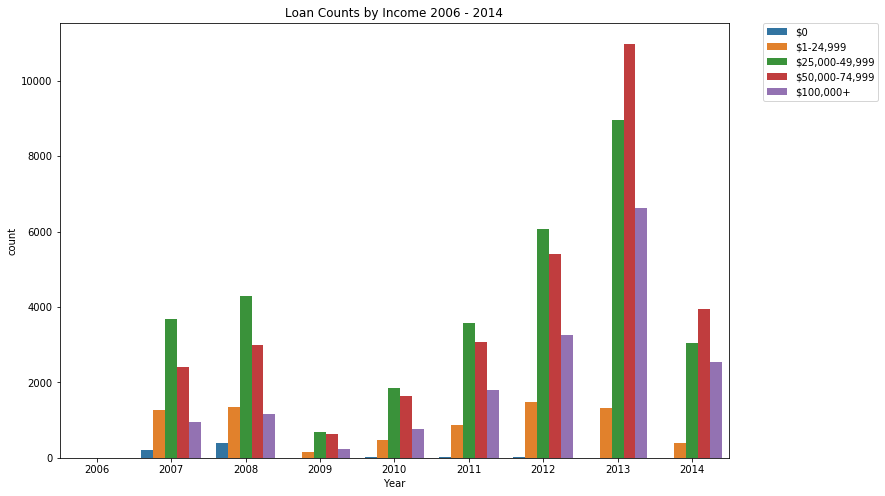

In [121]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
plt.figure(figsize =(12,8))
sb.countplot(data = df, x = 'Year', hue = 'IncomeRange', hue_order = income_order)
plt.title('Loan Counts by Income 2006 - 2014')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Figure size 864x576 with 0 Axes>

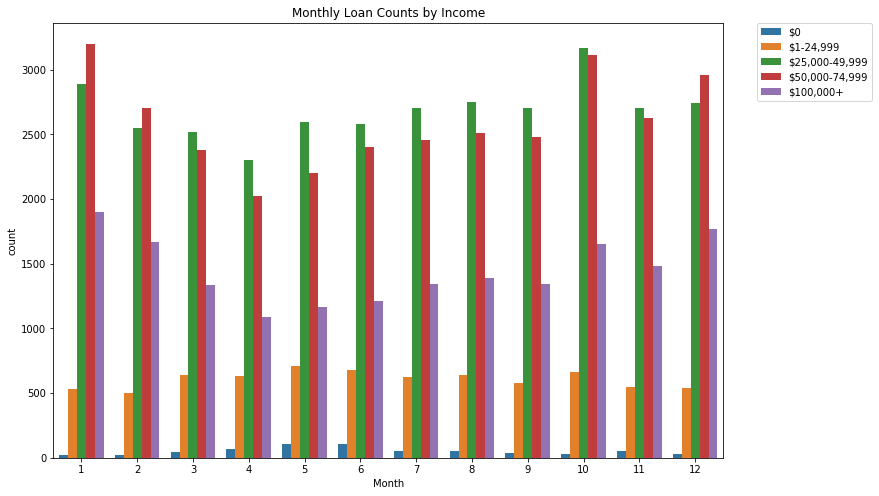

<Figure size 864x576 with 0 Axes>

In [51]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$100,000+']
plt.figure(figsize =(12,8))
sb.countplot(data = df, x = 'Month', hue = 'IncomeRange', hue_order = income_order)
plt.title('Monthly Loan Counts by Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize =(12,8))

Looking 'Monthly Loan Counts by Income', I thought there would be a more dramatic change in the number of loans for each income group by month, identifying different trends for different income groups. However, this is not the case. They all follow the trend identified earlier. There are more loans in the winter and less in the summer. The exception to this would be the income group 1-24000 which is relatively even across the months.

The plot showing loan counts by year for each income group is also not very telling. It shows the same trend as our heat map earlier where there is a dip in loans after the recession in 2008 and a steady climb afterwards.

# New Exploration

## Univariate

There is nothing really very telling about the borrowing habits for different income levels over time so I'm going to have a look at loan purposes. The column 'ListingCategory' has information on what the loan is to be used for.

In [65]:
#rename awkward column name
df = df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})
#replace numeric categories with category values found in the prosper loans variable definitions pdf.
categories = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
              5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
              11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental',
              16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
df['ListingCategory'].replace(to_replace = categories, inplace = True);

In [66]:
df.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16374
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64


Which type of loans are most popular?

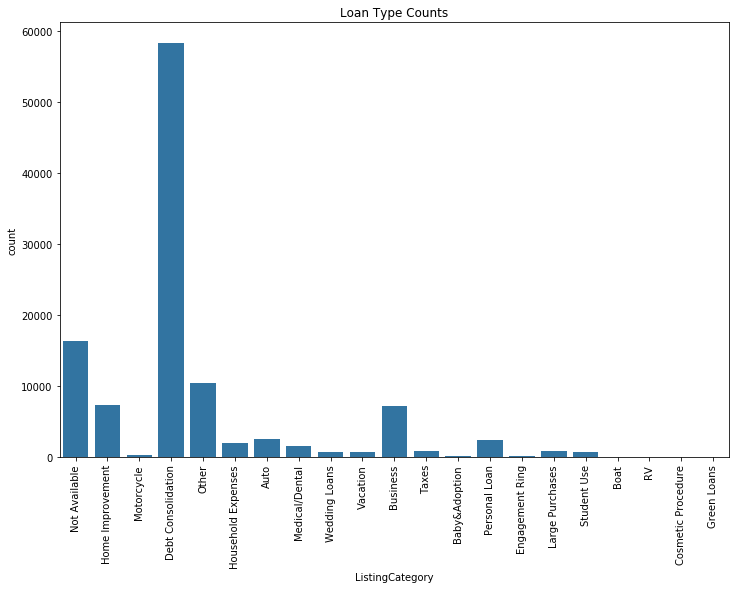

In [71]:
plt.figure(figsize = (12,8))
sb.countplot(data = df, x = 'ListingCategory', color = base_color)
plt.title('Loan Type Counts')
plt.xticks(rotation = 90);

This plot is very telling. A huge amount of people use prosper loans for Debt Consolidation. The next highest categories are 'Not Available' and 'Other', which are of no use for our purposes. After that are 'Business', 'Home Improvement', 'Auto' etc. For marketing purposes this could be interesting. Now we'll take a look at when each of these types of loans is most popular.

## Bivariate

/Users/Joshua/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


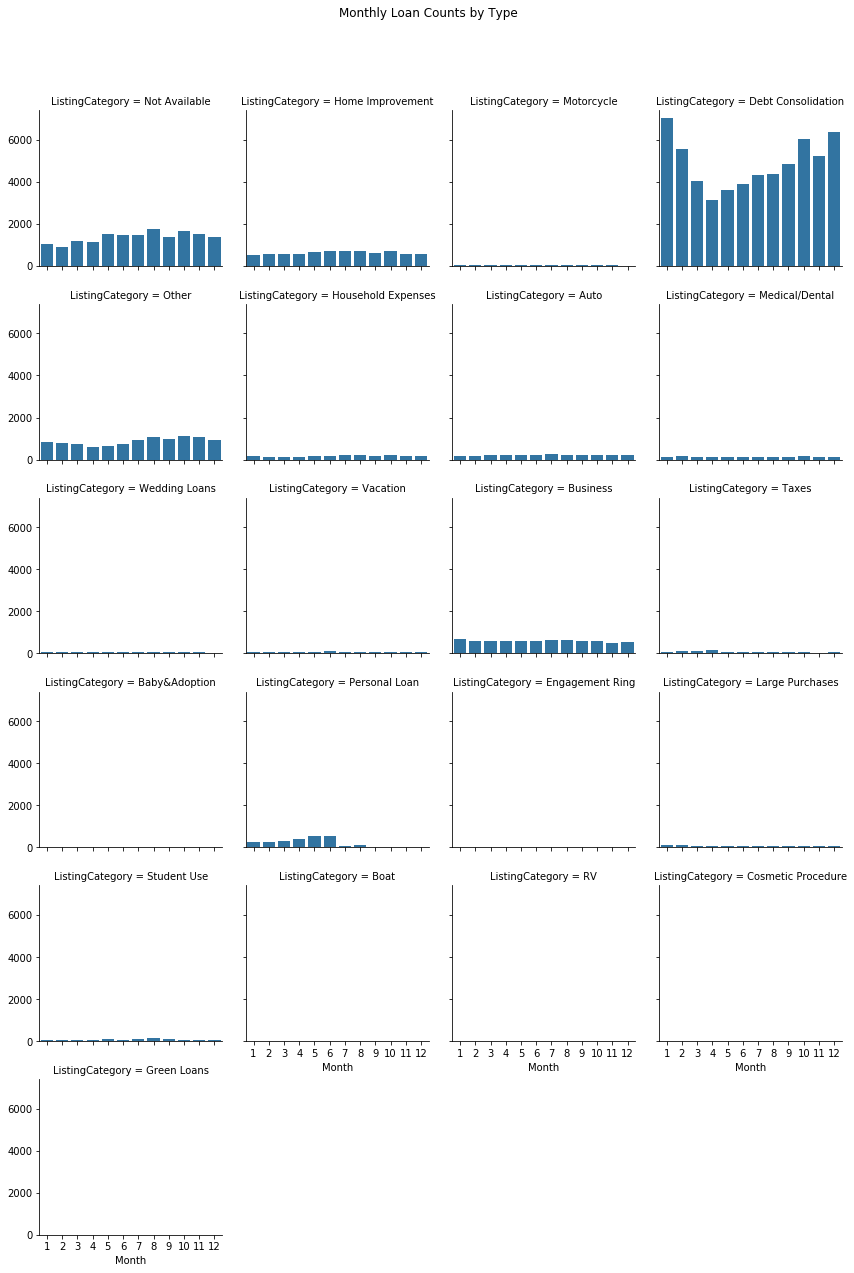

In [232]:
g = sb.FacetGrid(data = df, col = 'ListingCategory', col_wrap=4, margin_titles = True)
g.map(sb.countplot, 'Month')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Loan Counts by Type');

Obvious Trends-

Debt consolidation follows the samemontly trend we've seen so far. Obviously the large volume of loans in  this area is affecting the data heaviliy. 

Home Improvement, Auto, and Business loans seem pretty consistent across the months here. The visuals are too small to tell so we'll look at these further. 

Personal loans have a VERY obvious trend with most of them being taken out in the early months of the year.

Other categories of interest are Wedding and Engagement Rings. Though they don't account for a noticiable proportion of loans, Rings and Weddings tend to be very pricey so they may account for a large amount of money borrowed.

Text(0.5,1,'Personal Loans Monthly')

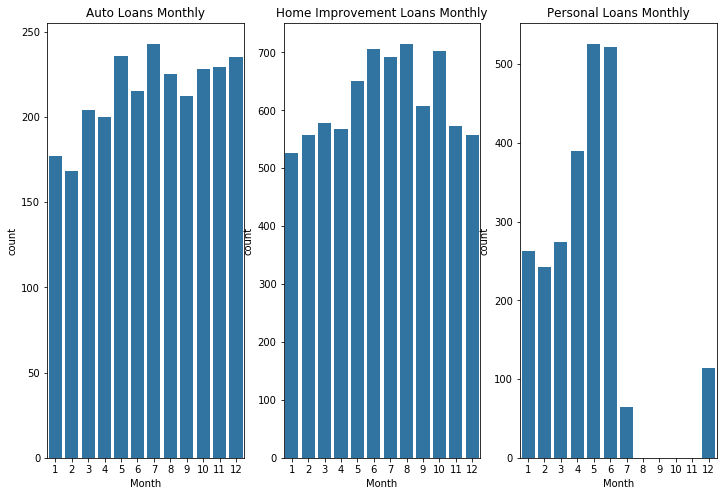

In [100]:

fig = plt.figure(figsize = (12,8))

plt.subplot(1, 3, 1)
sb.countplot(data = df[df.ListingCategory == 'Auto'], x = 'Month', color = base_color)
plt.title('Auto Loans Monthly')
plt.subplot(1, 3, 2)
sb.countplot(data = df[df.ListingCategory == 'Home Improvement'], x = 'Month', color = base_color)
plt.title('Home Improvement Loans Monthly')
plt.subplot(1, 3, 3)
sb.countplot(data = df[df.ListingCategory == 'Personal Loan'], x = 'Month',
             color = base_color, order = (np.arange(1,13,1)))
plt.title('Personal Loans Monthly')

Text(0.5,1,'Engagement Ring Loans Monthly')

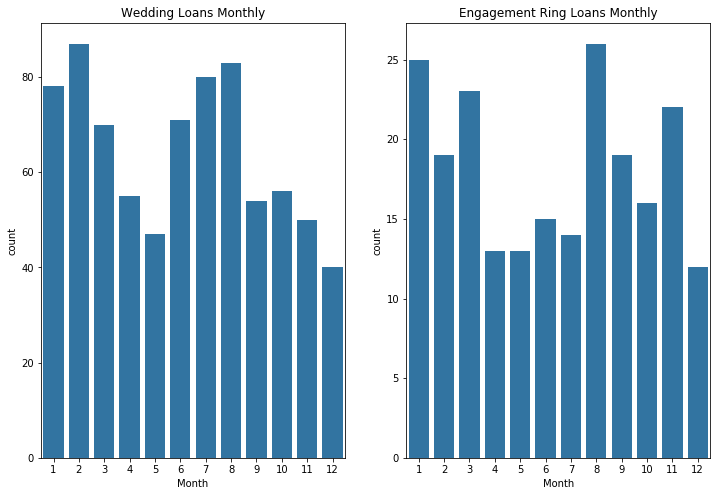

In [119]:
#wedding related categories
fig = plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
sb.countplot(data = df[df.ListingCategory == 'Wedding Loans'], x = 'Month', color = base_color)
plt.title('Wedding Loans Monthly')
plt.subplot(1, 2, 2)
sb.countplot(data = df[df.ListingCategory == 'Engagement Ring'], x = 'Month', color = base_color)
plt.title('Engagement Ring Loans Monthly')

In [115]:
#create list of interesting categories for further exploration.
interest_categories = ['Auto', 'Home Improvement', 'Personal Loan', 'Engagement Ring', 'Wedding Loans', 'Business']
#group categories and sum loan values
vals = df[df.ListingCategory.isin(interest_categories)].groupby('ListingCategory')['LoanOriginalAmount'].sum()

Text(0.5,1,'Total Value of Categories')

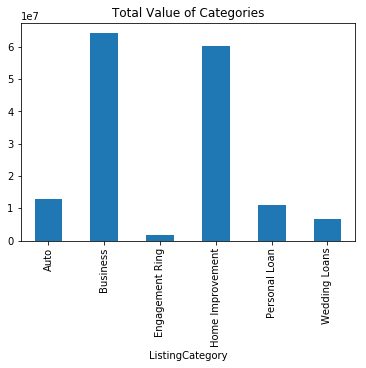

In [117]:
#plot total value of each category
vals.plot(kind = 'bar', color = base_color)
plt.title('Total Value of Categories')
plt.yticks()

For Prosper, the Cash Cow of loan types is Debt Consolidation. For Marketing efforts I'd reccomend they have a few niche campaigns using banner ads on related websites to target business owners, homeowners, car owners, and people about to get married. This will help grow their market share in other areas of money lending. Below are a few bar charts showing the number of loans of each type.

/Users/Joshua/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


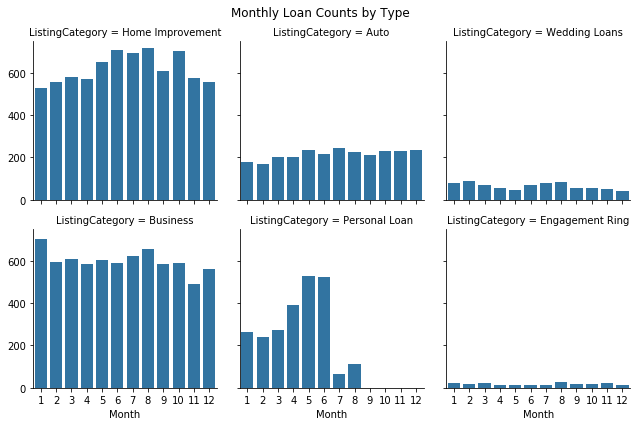

In [233]:
g = sb.FacetGrid(data = df[df.ListingCategory.isin(interest_categories)], col = 'ListingCategory', col_wrap=3)
g.map(sb.countplot, 'Month')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Loan Counts by Type');

## Multivariate

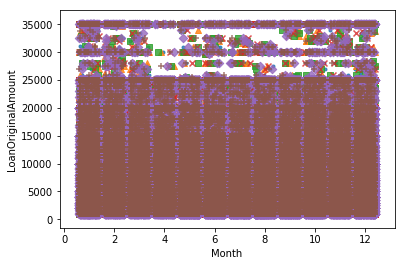

In [160]:
ptype_markers = [['Auto',"."], ['Home Improvement',"^"], ['Personal Loan',"s"], ['Engagement Ring',"x"],
    ['Wedding Loans',"D"], ['Business',"+"]]

for ptype, marker in ptype_markers:
    plot_data = df[df.ListingCategory == ptype]
    sb.regplot(data = df, x = 'Month', y = 'LoanOriginalAmount', x_jitter = 0.4, fit_reg=False, marker = marker)

I thought that would come out differently... lets try something else.

In [166]:
vals = df[df.ListingCategory.isin(interest_categories)].groupby(['Month', 'ListingCategory'])['LoanOriginalAmount'].sum()
vals = vals.reset_index()

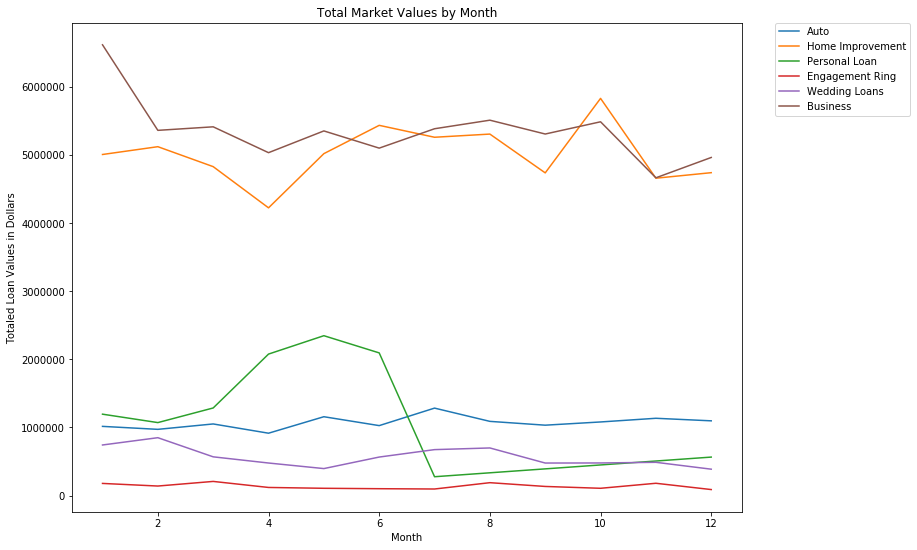

In [223]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_axes([.125,.125,.775,.755])
for label in interest_categories:
    vals[vals.ListingCategory == label].plot(x = 'Month', y = 'LoanOriginalAmount', ax = ax)
    plt.title('Total Market Values by Month')
    plt.xlabel('Month')
    plt.ylabel('Totaled Loan Values in Dollars')
    plt.legend(labels = interest_categories, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

If the company were looking to grow their share of loans in different areas, the figure above identifies monthly trends in loan values. Business loan total values peak in January and dip in Nov, Home Improvement Loans are most valuable in late-summer or early-autumn, Personal Loans are valuable in the first half of the year, etc. If the company were interesting in loaning as much money as possible, their marketing team could use this information to target different groups at the right time of year.